# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

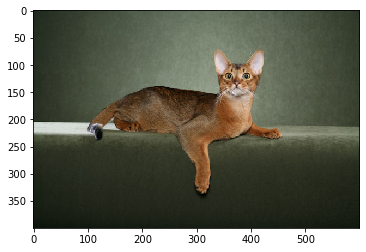

In [22]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


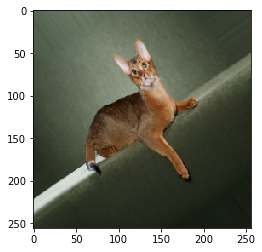

In [25]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-100,-50,0,50,100],
    height_shift_range=[-50,0,50]
)

Found 1 images belonging to 1 classes.


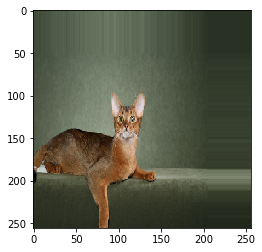

In [35]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


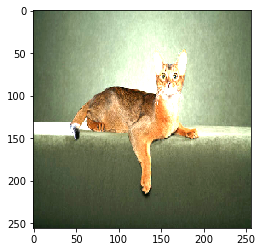

In [39]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5, 2.)
    # Your code here
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


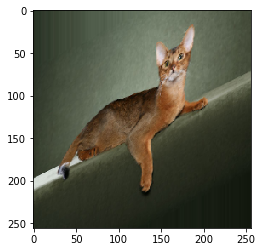

In [41]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


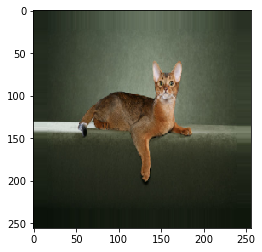

In [46]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=[0.5,1.2]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


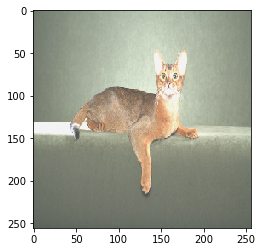

In [50]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


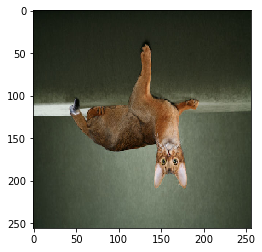

In [52]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
    
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [56]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
    
)

generator.fit(x_train)

In [57]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.12207279 0.868559 [[7]]
120.70756512369792


### Samplewise

In [59]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-9.934108e-09 1.0 [[5]]


# Task 10: Rescale and Preprocessing Function

In [60]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    
)

In [61]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [62]:
print(x.mean(), x.std(), y)

-0.085281335 0.34622574 [[4]]


# Task 11: Using in Model Training

In [65]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
    
)

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False, input_shape=(32,32,3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


In [71]:
_=model.fit(
    generator.flow(x_train,y_train,batch_size=32),
    epochs=5,steps_per_epoch=50
)

  ...
    to  
  ['...']
Train for 50 steps
Epoch 1/5
50/50 [==============================] - 23s 465ms/step - loss: 2.4939 - accuracy: 0.2475
Epoch 2/5
50/50 [==============================] - 23s 461ms/step - loss: 2.0220 - accuracy: 0.3256
Epoch 3/5
50/50 [==============================] - 28s 559ms/step - loss: 1.8408 - accuracy: 0.3750
Epoch 4/5
50/50 [==============================] - 26s 519ms/step - loss: 1.7824 - accuracy: 0.4087
Epoch 5/5
50/50 [==============================] - 32s 639ms/step - loss: 1.7627 - accuracy: 0.3994
